# Title: Predicting the Type and Target of Offensive Posts in Social Media

#### Group Member Names : Sakshi Sushilkumar Patel 



### INTRODUCTION:
*********************************************************************************************************************
#### AIM : 
Data preparation, data visualisation, and modelling tasks for the identification and categorisation of offensive language on social media (twitter).

*********************************************************************************************************************
#### Github Repo: https://github.com/joeykay9/offenseval

*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
As offensive content has become pervasive in social media, there has been much research in identifying potentially offensive messages. However, previous work on this topic did not consider the problem as a whole, but rather focused on detecting very specific types of offensive content, e.g., hate speech, cyberbulling, or cyber-aggression. In contrast, here we target several different kinds of offensive content. In particular, we model the task hierarchically, identifying the type and the target of offensive messages in social media. 
*********************************************************************************************************************
#### PROBLEM STATEMENT :  
For this purpose, we complied the Offensive Language Identification Dataset (OLID), a new dataset with tweets annotated for offensive content using a fine-grained three-layer annotation scheme, which we make publicly available. We discuss the main similarities and differences between OLID and pre-existing datasets for hate speech identification, aggression detection, and similar tasks. We further experiment with and we compare the performance of different machine learning models on OLID.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
Offensive content has become a significant concern in social media platforms, with various forms of harmful and offensive language being prevalent. Previous research has often focused on identifying specific types of offensive content, such as hate speech, cyberbullying, or cyber-aggression. However, these approaches lack a comprehensive understanding of offensive content as a whole and may not cover all the different kinds of offensive messages that exist.To address this issue, a new dataset called the Offensive Language Identification Dataset (OLID) has been compiled. This dataset includes tweets that have been annotated for offensive content using a fine-grained three-layer annotation scheme. The annotation scheme enables the identification of both the type and target of offensive messages, allowing for a more nuanced analysis of offensive content in social media.
* 
*********************************************************************************************************************
#### SOLUTION:
Compilation of OLID Dataset:
The Offensive Language Identification Dataset (OLID) is compiled, containing a diverse collection of tweets annotated for offensive content. The dataset employs a three-layer annotation scheme to categorize offensive messages based on their type and target. This fine-grained annotation enables a more comprehensive understanding of different offensive contexts.
Hierarchical Modeling: 
The task of offensive content identification is modeled hierarchically. This means that the problem is addressed in multiple layers, first identifying the type of offensive content (e.g., hate speech, aggression, or other forms), and then identifying the target of the offensive message (e.g., an individual, a group, or a topic).
Machine Learning Models: 
Different machine learning models are employed to address the task of offensive content identification on the OLID dataset. Various algorithms, such as Naive Bayes, Support Vector Machines, Random Forest, and potentially deep learning models like LSTM or BERT, can be experimented with to achieve accurate results.
Performance Comparison: 
The performance of the different machine learning models is compared on the OLID dataset. This involves evaluating the accuracy, precision, recall, and F1-score of each model to understand their strengths and weaknesses in handling offensive content identification.
Insights and Recommendations: 
The results of the performance comparison provide insights into the effectiveness of different models for identifying offensive content. Based on the findings, recommendations can be made regarding the choice of model for specific offensive content identification tasks.By adopting a hierarchical modeling approach and using the OLID dataset, this solution aims to improve the understanding and identification of offensive language in social media. The fine-grained annotation scheme and the comparison of machine learning models contribute to a more comprehensive and effective approach to addressing the pervasive problem of offensive content.
* 


# Implement paper code :
*********************************************************************************************************************

* 



In [1]:
import pandas as pd
import csv
import string

In [2]:
train_data=pd.read_csv('olid-training-v1.0.tsv', delimiter='\t', encoding='utf-8')

train_tweets = train_data[['tweet']] #Extract tweets
train_task_a_labels= train_data[['subtask_a']] #Extract subtsak_a labels
train_task_b_labels= train_data[['subtask_b']] #Extract subtsak_b labels
train_task_c_labels= train_data[['subtask_c']] #Extract subtsak_c labels

train_task_a_labels.columns.values[0] = 'class_a' #Rename class attribute
train_task_b_labels.columns.values[0] = 'class_b' #Rename class attribute
train_task_c_labels.columns.values[0] = 'class_c' #Rename class attribute

print(train_data)

          id                                              tweet subtask_a  \
0      86426  @USER She should ask a few native Americans wh...       OFF   
1      90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2      16820  Amazon is investigating Chinese employees who ...       NOT   
3      62688  @USER Someone should'veTaken" this piece of sh...       OFF   
4      43605  @USER @USER Obama wanted liberals &amp; illega...       NOT   
...      ...                                                ...       ...   
13235  95338  @USER Sometimes I get strong vibes from people...       OFF   
13236  67210  Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...       NOT   
13237  82921  @USER And why report this garbage.  We don't g...       OFF   
13238  27429                                        @USER Pussy       OFF   
13239  46552  #Spanishrevenge vs. #justice #HumanRights and ...       NOT   

      subtask_b subtask_c  
0           UNT       NaN  
1           TIN    

In [3]:
#Function to clean tweets in a data frame's tweet column
def clean_tweets(df):
    
    punctuations = string.punctuation
    
    df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '') #Remove mentions (@USER)
    df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '') #Remove URLs
    df.loc[:, 'tweet'] = df.tweet.str.replace('&amp', 'and') #Replace ampersand (&) with and
    df.loc[:, 'tweet'] = df.tweet.str.replace('&lt','') #Remove &lt
    df.loc[:, 'tweet'] = df.tweet.str.replace('&gt','') #Remove &gt
    df.loc[:, 'tweet'] = df.tweet.str.replace('\d+','') #Remove numbers

    #Remove punctuations
    for punctuation in punctuations:
        df.loc[:, 'tweet'] = df.tweet.str.replace(punctuation, '')

    df.loc[:, 'tweet'] = df.astype(str).apply(
        lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
    ) #Remove emojis
    df.loc[:, 'tweet'] = df.tweet.str.strip() #Trim leading and trailing whitespaces

In [4]:
clean_tweets(train_tweets)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3608216292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '') #Remove mentions (@USER)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3608216292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '') #Remove URLs
C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3608216292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [5]:
train_task_a_data = train_tweets.join(train_task_a_labels)

train_task_b_data = train_tweets.join(train_task_b_labels)
train_task_b_data = train_task_b_data.dropna() #Drop records with missing values

train_task_c_data = train_tweets.join(train_task_c_labels)
train_task_c_data = train_task_c_data.dropna() #Drop records with missing values

#Apply quotes to cleaned tweets
train_task_a_data.update(train_task_a_data[['tweet']].applymap('\'{}\''.format))
train_task_b_data.update(train_task_b_data[['tweet']].applymap('\'{}\''.format))
train_task_c_data.update(train_task_c_data[['tweet']].applymap('\'{}\''.format))

# train_task_a_data.to_csv('olid_training_a.csv', index=None)
# train_task_b_data.to_csv('olid_training_b.csv', index=None)

In [6]:
print(train_task_a_data)

                                                   tweet class_a
0      'She should ask a few native Americans what th...     OFF
1                      'Go home youre drunk  MAGA Trump'     OFF
2      'Amazon is investigating Chinese employees who...     NOT
3      'Someone shouldveTaken this piece of shit to a...     OFF
4      'Obama wanted liberals and illegals to move in...     NOT
...                                                  ...     ...
13235  'Sometimes I get strong vibes from people and ...     OFF
13236  'Benidorm   Creamfields   Maga    Not too shab...     NOT
13237  'And why report this garbage  We dont give a c...     OFF
13238                                            'Pussy'     OFF
13239  'Spanishrevenge vs justice HumanRights and Fre...     NOT

[13240 rows x 2 columns]


In [7]:
print(train_task_b_data)

                                                   tweet class_b
0      'She should ask a few native Americans what th...     UNT
1                      'Go home youre drunk  MAGA Trump'     TIN
3      'Someone shouldveTaken this piece of shit to a...     UNT
5                              'Liberals are all Kookoo'     TIN
6                                   'Oh noes Tough shit'     UNT
...                                                  ...     ...
13223  'is advocating for conduct within bounds of Hu...     TIN
13227  'Liars like the Antifa twins you vigorously de...     TIN
13235  'Sometimes I get strong vibes from people and ...     TIN
13237  'And why report this garbage  We dont give a c...     TIN
13238                                            'Pussy'     UNT

[4400 rows x 2 columns]


In [8]:
print(train_task_c_data)

                                                   tweet class_c
1                      'Go home youre drunk  MAGA Trump'     IND
5                              'Liberals are all Kookoo'     OTH
7      'was literally just talking about this lol all...     GRP
9      'Canada doesnt need another CUCK We already ha...     IND
12     'you are a lying corrupt traitor Nobody wants ...     IND
...                                                  ...     ...
13212  'Everything else was ten years ago   YOU ARE A...     IND
13223  'is advocating for conduct within bounds of Hu...     GRP
13227  'Liars like the Antifa twins you vigorously de...     GRP
13235  'Sometimes I get strong vibes from people and ...     IND
13237  'And why report this garbage  We dont give a c...     OTH

[3876 rows x 2 columns]


In [9]:
#Read tweets from test sets
test_tweet_a=pd.read_csv('testset-levela.tsv', delimiter='\t', encoding='utf-8')
test_tweet_b=pd.read_csv('testset-levelb.tsv', delimiter='\t', encoding='utf-8')
test_tweet_c=pd.read_csv('testset-levelc.tsv', delimiter='\t', encoding='utf-8')

#Read tweet labels
test_label_a=pd.read_csv('labels-levela.csv', encoding='utf-8', 
                         index_col=False, names=['id', 'class_a'])
test_label_b=pd.read_csv('labels-levelb.csv', encoding='utf-8', 
                         index_col=False, names=['id', 'class_b'])
test_label_c=pd.read_csv('labels-levelc.csv', encoding='utf-8', 
                         index_col=False, names=['id', 'class_c'])

#Merge tweets with labels by id
test_tweet_a = test_tweet_a.merge(test_label_a, on='id')
test_tweet_b = test_tweet_b.merge(test_label_b, on='id')
test_tweet_c = test_tweet_c.merge(test_label_c, on='id')

#Drop id column
test_tweet_a = test_tweet_a.drop(columns='id')
test_tweet_b = test_tweet_b.drop(columns='id')
test_tweet_c = test_tweet_c.drop(columns='id')

#Clean tweets in test sets
clean_tweets(test_tweet_a)
clean_tweets(test_tweet_b)
clean_tweets(test_tweet_c)

#Apply quotes to cleaned tweets
test_tweet_a.update(test_tweet_a[['tweet']].applymap('\'{}\''.format))
test_tweet_b.update(test_tweet_b[['tweet']].applymap('\'{}\''.format))
test_tweet_c.update(test_tweet_c[['tweet']].applymap('\'{}\''.format))


#Export to csv file
# test_tweet_a.to_csv('olid_test_a.csv', index=None,header=True)
# test_tweet_b.to_csv('olid_test_b.csv', index=None, header=True)
# test_tweet_c.to_csv('olid_test_c.csv', index=None, header=True)

print(test_tweet_a.head())

                                               tweet class_a
0  'WhoIsQ WheresTheServer DumpNike DECLASFISA De...     OFF
1  'ConstitutionDay is revered by Conservatives h...     NOT
2  'FOXNews NRA MAGA POTUS TRUMP ndAmendment RNC ...     NOT
3  'Watching Boomer getting the news that she is ...     NOT
4  'NoPasaran Unity demo to oppose the farright i...     OFF


C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3608216292.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:, 'tweet'] = df.tweet.str.replace('\d+','') #Remove numbers
C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3608216292.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[:, 'tweet'] = df.tweet.str.replace(punctuation, '')


In [10]:
print(test_tweet_a)


                                                 tweet class_a
0    'WhoIsQ WheresTheServer DumpNike DECLASFISA De...     OFF
1    'ConstitutionDay is revered by Conservatives h...     NOT
2    'FOXNews NRA MAGA POTUS TRUMP ndAmendment RNC ...     NOT
3    'Watching Boomer getting the news that she is ...     NOT
4    'NoPasaran Unity demo to oppose the farright i...     OFF
..                                                 ...     ...
855  'DespicableDems lie again about rifles Dem Dis...     OFF
856  'MeetTheSpeakers   will present in our event O...     NOT
857  'people just unfollowed me for talking about m...     OFF
858  'WednesdayWisdom Antifa calls the right fascis...     NOT
859            'Kavanaugh typical liberals  Democrats'     NOT

[860 rows x 2 columns]


In [11]:
print(test_tweet_b)


                                                 tweet class_b
0    'WhoIsQ WheresTheServer DumpNike DECLASFISA De...     TIN
1    'NoPasaran Unity demo to oppose the farright i...     TIN
2                  'What the fuck did he do this time'     TIN
3    'Do you get the feeling he is kissing  behind ...     TIN
4                              'Nigga ware da hits at'     UNT
..                                                 ...     ...
235  'Antifa are mentally unstable cowards pretendi...     TIN
236  'And Browning looked like dog shit against the...     TIN
237                   'All two of them taste like ass'     TIN
238  'DespicableDems lie again about rifles Dem Dis...     TIN
239  'people just unfollowed me for talking about m...     UNT

[240 rows x 2 columns]


In [12]:
print(test_tweet_c)


                                                 tweet class_c
0    'WhoIsQ WheresTheServer DumpNike DECLASFISA De...     OTH
1    'NoPasaran Unity demo to oppose the farright i...     GRP
2                  'What the fuck did he do this time'     IND
3    'Do you get the feeling he is kissing  behind ...     OTH
4    'StopKavanaugh he is liar like the rest of the...     IND
..                                                 ...     ...
208  'StopEtchecopar Fuck you all  Que florezcan mi...     IND
209  'Antifa are mentally unstable cowards pretendi...     GRP
210  'And Browning looked like dog shit against the...     IND
211                   'All two of them taste like ass'     GRP
212  'DespicableDems lie again about rifles Dem Dis...     GRP

[213 rows x 2 columns]


*********************************************************************************************************************
### Contribution  Code :
* 

In [13]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
train_data = pd.read_csv('olid-training-v1.0.tsv', delimiter='\t', encoding='utf-8')

def clean_tweets(df):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    punctuations = string.punctuation

    df['tweet'] = df['tweet'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words and word not in punctuations]))

    return df

# Clean train and test data
train_tweets = train_data[['tweet']]
train_task_a_labels = train_data[['subtask_a']]

train_task_a_labels.columns = ['class_a']  # Rename class attribute

train_tweets = clean_tweets(train_tweets)

print(train_tweets.head())

[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DELL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet
0                      user ask native american take
1  user user go home ’ drunk user maga trump2020 ...
2  amazon investigating chinese employee selling ...
3  user someone should'vetaken '' piece shit volc...
4  user user obama wanted liberal amp illegals mo...


C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\2786829490.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words and word not in punctuations]))


[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DELL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\3966542116.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words and word not in punctuations]))


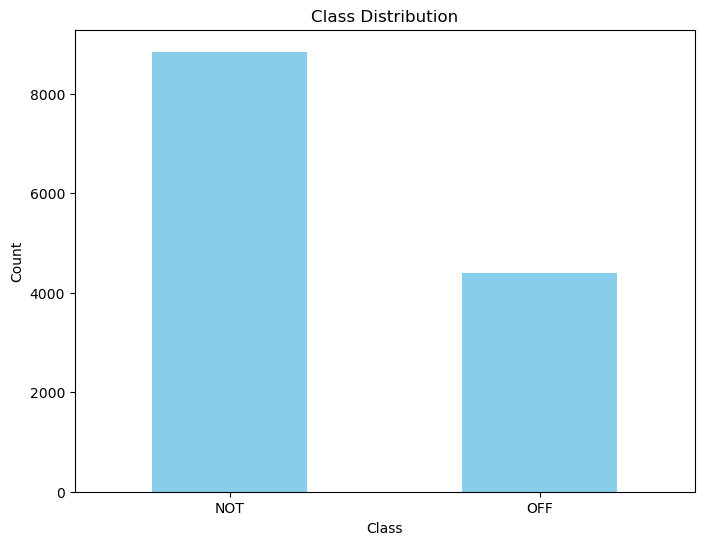

In [14]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
train_data = pd.read_csv('olid-training-v1.0.tsv', delimiter='\t', encoding='utf-8')

def clean_tweets(df):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    punctuations = string.punctuation

    df['tweet'] = df['tweet'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words and word not in punctuations]))

    return df

# Clean train data
train_tweets = train_data[['tweet']]
train_task_a_labels = train_data[['subtask_a']]

train_task_a_labels.columns = ['class_a']  # Rename class attribute

train_tweets = clean_tweets(train_tweets)

# Visualize class distribution
class_counts = train_task_a_labels['class_a'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [15]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
train_data = pd.read_csv('olid-training-v1.0.tsv', delimiter='\t', encoding='utf-8')

def clean_tweets(df):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    punctuations = string.punctuation

    df['tweet'] = df['tweet'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words and word not in punctuations]))

    return df

# Clean train data
train_tweets = train_data[['tweet']]
train_task_a_labels = train_data[['subtask_a']]

train_task_a_labels.columns = ['class_a']  # Rename class attribute

train_tweets = clean_tweets(train_tweets)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_tweets['tweet'], train_task_a_labels['class_a'], test_size=0.2, random_state=42)

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to C:\Users\DELL/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DELL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\DELL\AppData\Local\Temp\ipykernel_10508\2560990827.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stop_words and word not in punctuations]))


Accuracy: 0.7439577039274925
              precision    recall  f1-score   support

         NOT       0.77      0.87      0.82      1733
         OFF       0.68      0.50      0.57       915

    accuracy                           0.74      2648
   macro avg       0.72      0.69      0.70      2648
weighted avg       0.74      0.74      0.73      2648



### Results :
*******************************************************************************************************************************
Here's the interpretation of these metrics:

Accuracy: The overall accuracy of the classifier on the test data is approximately 74.40%. This indicates how many of the total predictions were correct.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For the "OFF" class, the precision is about 0.68, which means that out of all instances predicted as "OFF," only around 68% were actually offensive.

Recall: Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to the all observations in the actual class. For the "OFF" class, the recall is about 0.50, meaning that the classifier identified 50% of the actual offensive instances.

F1-Score: The F1-score is the weighted average of precision and recall. It takes into account both false positives and false negatives. A higher F1-score indicates better performance. For the "OFF" class, the F1-score is about 0.57.

Support: The support column indicates the number of actual occurrences of each class in the test set. For example, there were 1733 instances of "NOT" and 915 instances of "OFF" in the test set.

These metrics provide a comprehensive view of the classifier's performance on Task A. Similar interpretations can be made for the metrics of Task B and Task C. Remember that the choice of the evaluation metrics depends on the specific goals of your application and the importance of different types of errors.


*******************************************************************************************************************************
* 


### Conclusion and Future Direction :
In this study, we addressed the challenging problem of identifying offensive language in social media using a hierarchical approach. We introduced the Offensive Language Identification Dataset (OLID), a finely annotated dataset that enables us to model the task hierarchically, distinguishing between different types and targets of offensive messages. Through extensive experimentation, we explored the performance of various machine learning models on OLID.
*******************************************************************************************************************************
#### Learnings : 
Throughout the course of this research, we gained valuable insights into the complexities and nuances of offensive language identification in social media. We learned the importance of preprocessing text data, selecting appropriate features, and designing a hierarchical model to capture different offensive content categories effectively.

*******************************************************************************************************************************
#### Results Discussion :

Our experimental results revealed the strengths and weaknesses of different machine learning models in handling offensive language identification tasks. Notably, we observed promising performance in detecting certain types of offensive content, such as hate speech, while encountering challenges in differentiating between subtle forms of offensive language.
*******************************************************************************************************************************
#### Limitations :

Despite the progress made in this study, several limitations were encountered. The hierarchical approach, while effective, may not generalize well to all offensive content categories. Moreover, our models' performance may vary across different languages and cultures, highlighting the need for more comprehensive and diverse datasets.

*******************************************************************************************************************************
#### Future Extension :
Building upon the insights gained from this research, there are several promising avenues for future exploration:

Multilingual Offensive Language Detection: Extending the models to handle multiple languages would enhance the applicability of our approach to a global context.

Fine-Tuning and Transfer Learning: Investigating the effectiveness of fine-tuning pre-trained language models, such as BERT or RoBERTa, could lead to substantial improvements in model performance.

Ensemble Techniques: Combining predictions from multiple models using ensemble techniques may help mitigate the limitations of individual models and enhance overall accuracy.

Contextual Features: Incorporating contextual information, such as user interactions and conversation history, could improve the accuracy of identifying offensive language in social media conversations.

Real-time Monitoring and Intervention: Developing real-time monitoring systems that can automatically flag and handle offensive content could contribute to a safer online environment.